# 最急降下法（gradien descent）

<a href="https://colab.research.google.com/github/takunton/ds/blob/main/work/ds_ml/web/lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## １．データ準備

In [1]:
import pandas as pd
df = pd.read_csv('data/sample_data.csv')

In [2]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


## ２．データ可視化

In [3]:
import seaborn as sns

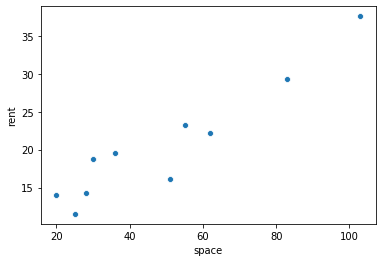

In [4]:
sns.scatterplot(x=df['space'], y=df['rent'], data=df)

## ３．損失関数

In [5]:
%load_ext autoreload
%autoreload 2

import sys; sys.path.append('/work/ds_ml/udemy/Util')
import MlUtil

In [6]:
MlUtil.const_func(x=df['space'], y=df['rent'], theta_0=5, theta_1=7)

138703.20244638805

## ４．損失関数可視化

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product

In [8]:
# 軸を定義
n0 = n1 = 300
min_0 = -20
max_0 = 20
min_1 = -1
max_1 = 1

# 軸の値リストを生成
theta_0 = np.linspace(min_0, max_0, n0)
theta_1 = np.linspace(min_1, max_1, n1)

# 配列の要素から格子列を生成する
theta_0_ax, theta_1_ax = np.meshgrid(theta_0, theta_1)

In [9]:
# 損失関数を計算
z = [MlUtil.const_func(x=df['space'], y=df['rent'], theta_0=param[0], theta_1=param[1]) for param in product(theta_0, theta_1)]
z = np.array(z)
Z = z.reshape(len(theta_0), len(theta_1))

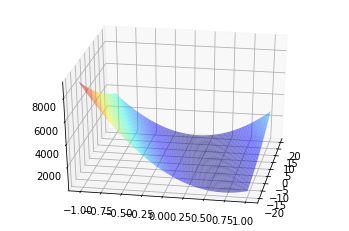

In [10]:
# 3D描画
ax = plt.axes(projection='3d')
ax.plot_surface(theta_0_ax.T, theta_1_ax.T, Z, cmap='jet', alpha=0.5)

# 軸を反転
plt.gca().invert_xaxis()
# グラフ表示視点を設定
ax.view_init(elev=30, azim=10)

### 3Dグラフ描画サンプル

In [11]:
MlUtil.const_func(x=df['space'], y=df['rent'], theta_0=theta_0[0], theta_1=theta_1[1])

9109.881032614798

In [12]:
x = np.linspace(1, 4, 4)
y = np.linspace(10, 50, 5)

# 配列の要素から格子列を生成する
X, Y = np.meshgrid(x, y)

In [13]:
from itertools import product
z = [x * y for x, y in product(x, y)]
z = np.array(z)
Z = z.reshape(len(x), len(y))

In [14]:
X

array([[1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.],
       [1., 2., 3., 4.]])

In [15]:
Y

array([[10., 10., 10., 10.],
       [20., 20., 20., 20.],
       [30., 30., 30., 30.],
       [40., 40., 40., 40.],
       [50., 50., 50., 50.]])

In [16]:
Z

array([[ 10.,  20.,  30.,  40.,  50.],
       [ 20.,  40.,  60.,  80., 100.],
       [ 30.,  60.,  90., 120., 150.],
       [ 40.,  80., 120., 160., 200.]])

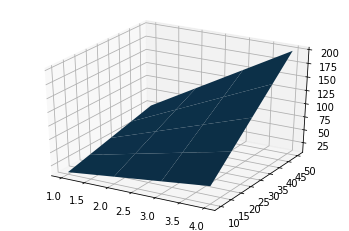

In [17]:
ax = plt.axes(projection='3d')
ax.plot_surface(X.T, Y.T, Z)

## ５．最急降下法

In [95]:
# 参考：ランダムで実施する方法
theta_0_init = np.random.uniform(min_0, max_0)
theta_1_init = np.random.uniform(min_1, max_1)

In [96]:
# θ1,θ2の初期値
theta_0_init = -5
theta_1_init = -0.5

# イテレーション数（一般的にエポックスと呼ぶ）
epochs = 100000

# 学習率
alpha = 0.00005

In [97]:
# パラメータ更新
theta_0 = theta_0_init
theta_1 = theta_1_init

# θの更新履歴リスト
theta_0_hist = []
theta_1_hist = []
theta_0_hist.append(theta_0)
theta_1_hist.append(theta_1)

for i in range(epochs):
    theta_0, theta_1 = MlUtil.update_theta(df['space'], df['rent'], theta_0, theta_1, alpha)
    theta_0_hist.append(theta_0)
    theta_1_hist.append(theta_1)

In [100]:
theta_0_hist[-1]

5.6923135837459435

In [101]:
theta_1_hist[-1]

0.29721946485471146